In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from Scripts.lire_mnist import lire_MNIST
from Scripts.principal_DNN_mnist import DNN
from Scripts.utils import train_test, plot_grid

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Etude sur MNIST

In [3]:
# Load the dataset and set the style for the plots
X_train, y_train = lire_MNIST("train")
X_test, y_test = lire_MNIST("test")
sns.set_style("darkgrid")

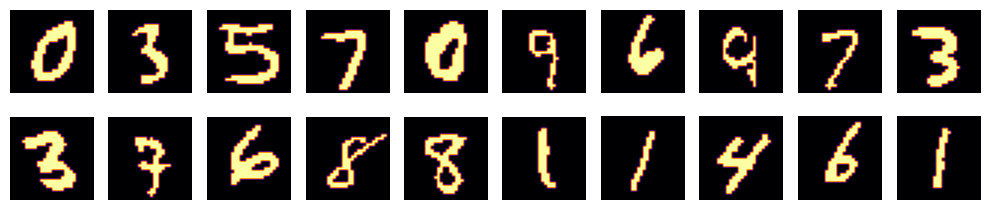

In [4]:
image_size = (28, 28)
plot_grid(X_train, image_size=image_size)

## Initialization

In [5]:
# Define hyperparameters for the network and training
hparams = {
    "n_epochs_RBM": 100,
    "n_epochs_retro": 200,
    "learning_rate": 0.001,
    "batch_size": 100,
}

In [6]:
# Define the number of layers, neurons, and training samples to test
n_layers = [2, 3, 4, 5, 6, 7, 8]
n_neurons = [100, 200, 300, 500, 700, 1000]
n_samples = [10, 100, 500, 1000, 3000, 7000, 10000, 30000, 60000]


## Analysis

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

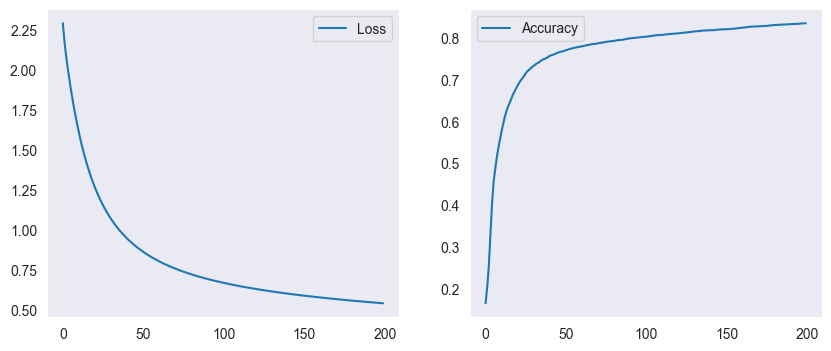

loss 0.5355 - acc 0.832 


  0%|          | 0/200 [00:00<?, ?it/s]

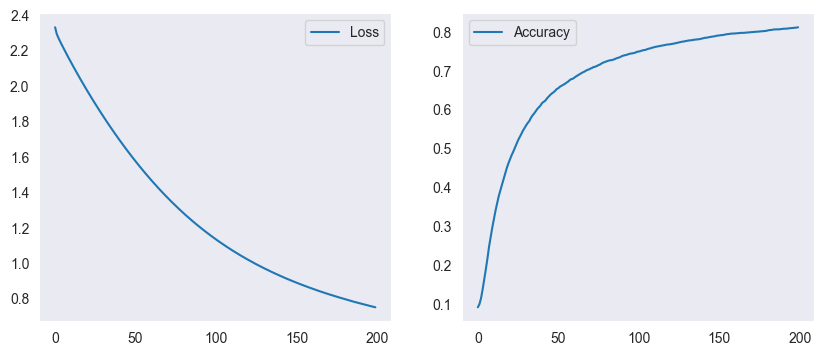

loss 0.7180 - acc 0.822 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

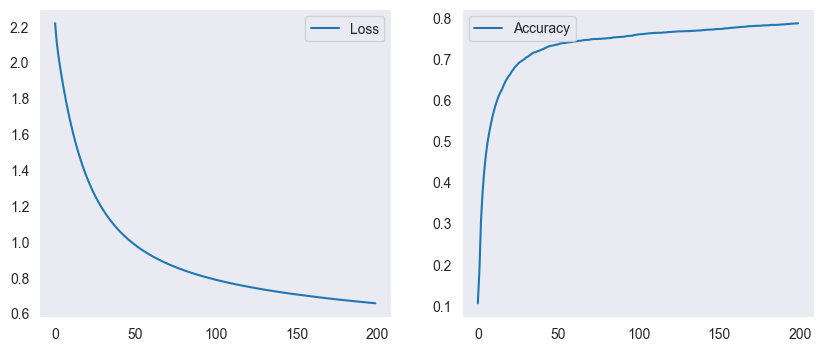

loss 0.6551 - acc 0.787 


  0%|          | 0/200 [00:00<?, ?it/s]

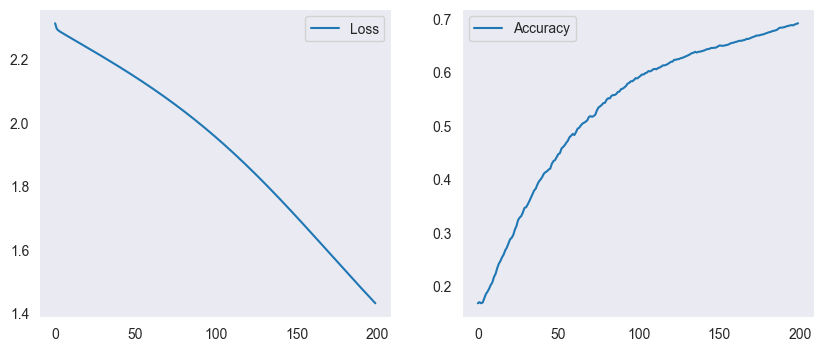

loss 1.4283 - acc 0.694 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

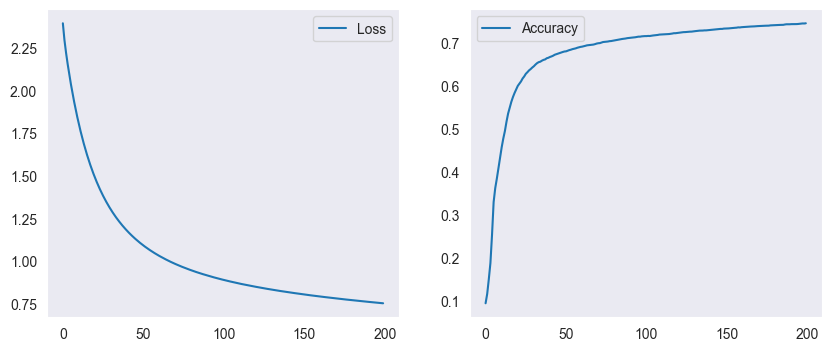

loss 0.7304 - acc 0.754 


  0%|          | 0/200 [00:00<?, ?it/s]

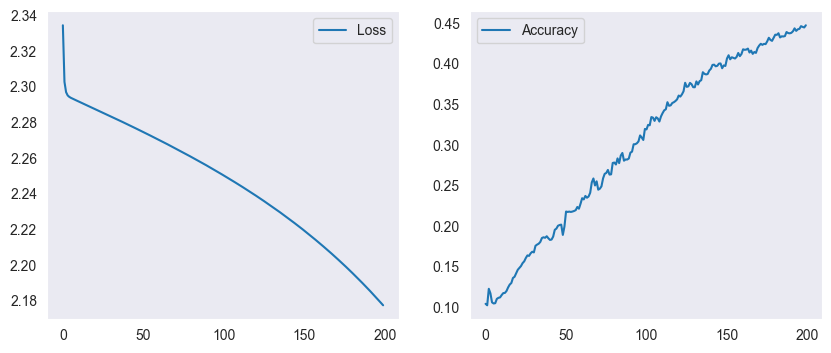

loss 2.1763 - acc 0.440 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

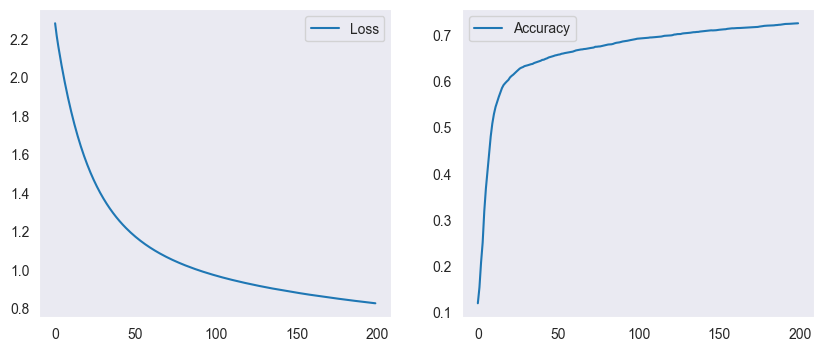

loss 0.7961 - acc 0.733 


  0%|          | 0/200 [00:00<?, ?it/s]

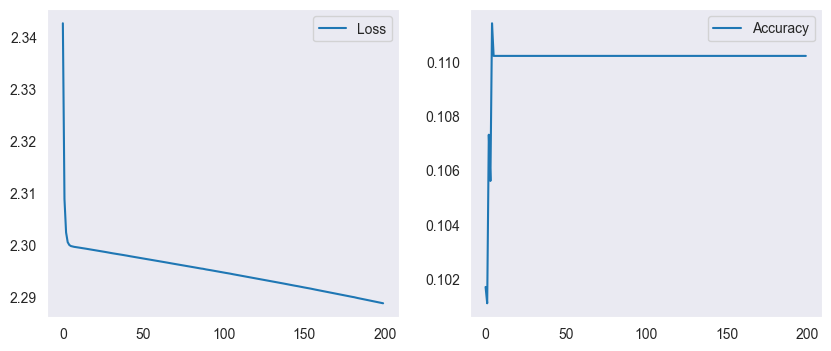

loss 2.2889 - acc 0.114 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

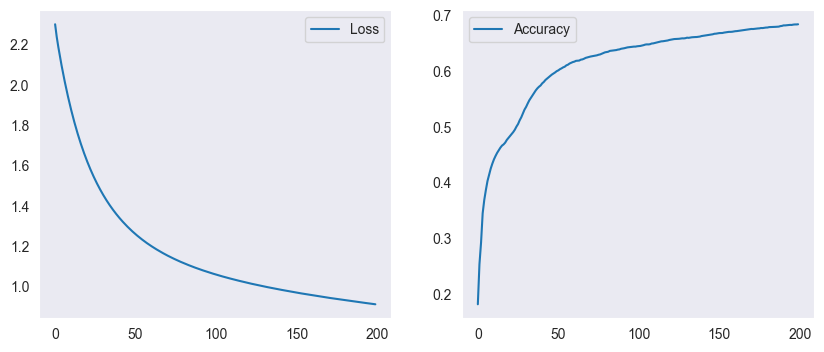

loss 0.8829 - acc 0.696 


  0%|          | 0/200 [00:00<?, ?it/s]

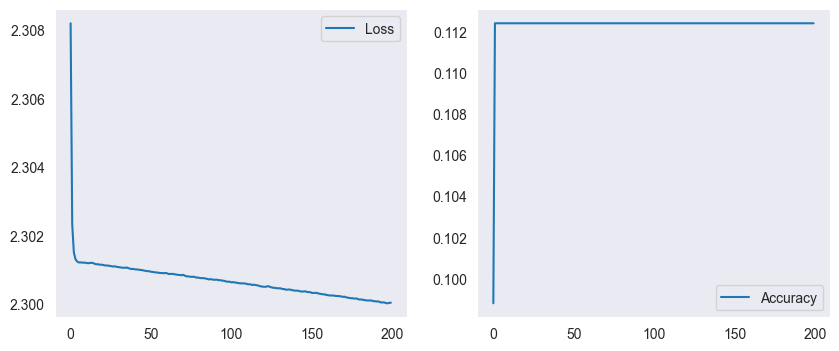

loss 2.3006 - acc 0.114 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

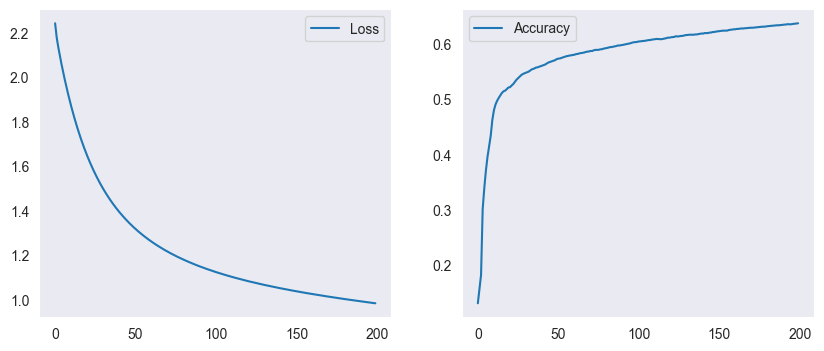

loss 0.9608 - acc 0.649 


  0%|          | 0/200 [00:00<?, ?it/s]

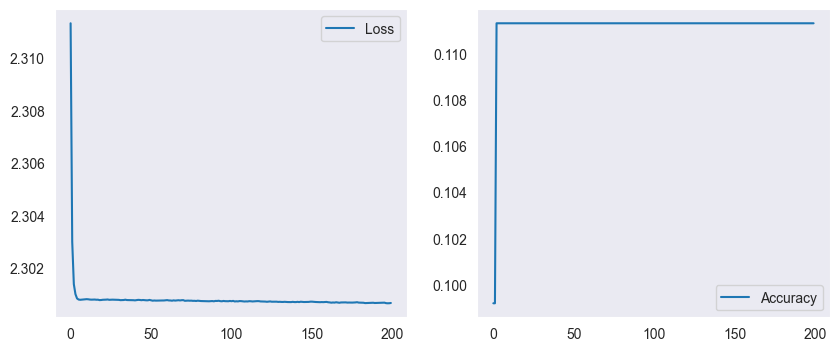

loss 2.3017 - acc 0.114 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

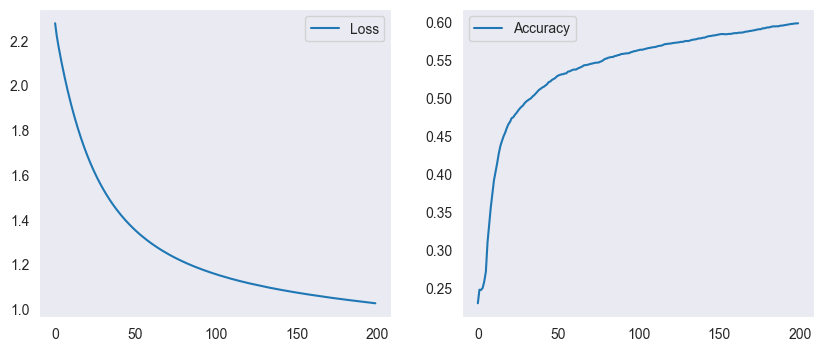

loss 1.0260 - acc 0.604 


  0%|          | 0/200 [00:00<?, ?it/s]

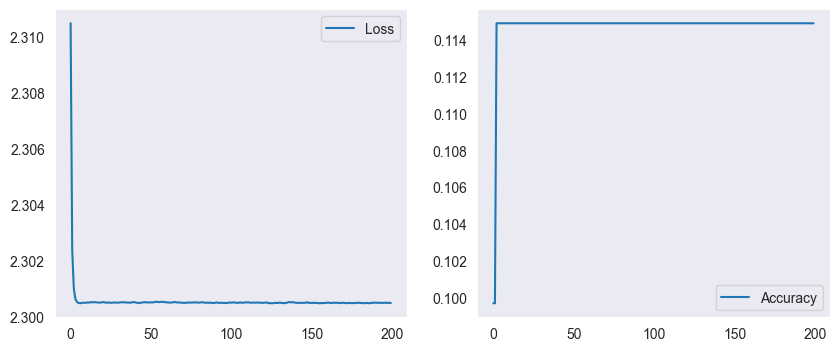

loss 2.3013 - acc 0.114 


In [7]:
# Train and test the networks for each configuration and store the results
results = []
for n_layer in n_layers:
    config = [[784, 200]] + [[200,200]] * (n_layer - 2) + [[200, 10]]
    result = {
        "n_layers": n_layer,
        "n_neurons": 200,
        "n_samples": 30000,
    }
    loss1, acc1 = train_test(config, hparams, X_train, y_train, X_test, y_test, pretrain=True)
    result["loss1"] = loss1
    result["acc1"] = acc1
    loss2, acc2 = train_test(config, hparams, X_train, y_train, X_test, y_test, pretrain=False)
    result["loss2"] = loss2
    result["acc2"] = acc2
    results.append(result)        

In [8]:
# Save the results in a CSV file
df = pd.DataFrame(results)
df.to_csv("./Results/results_layers.csv", index=False)
df

,n_layers,n_neurons,n_samples,loss1,acc1,loss2,acc2
0,2,200,30000,0.535457,0.8316,0.718032,0.8216
1,3,200,30000,0.655089,0.7875,1.428264,0.6935
2,4,200,30000,0.730449,0.7536,2.176272,0.4403
3,5,200,30000,0.796086,0.7333,2.288927,0.1135
4,6,200,30000,0.882939,0.6960,2.300580,0.1135
5,7,200,30000,0.960833,0.6492,2.301670,0.1135
6,8,200,30000,1.026013,0.6038,2.301280,0.1135


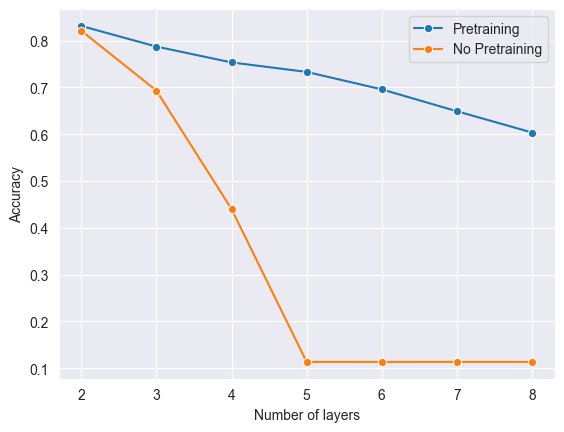

In [9]:
sns.lineplot(data=df, x="n_layers", y="acc1", marker="o", label="Pretraining")
sns.lineplot(data=df, x="n_layers", y="acc2", marker="o", label="No Pretraining")
plt.xlabel("Number of layers")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("./Results/accuracy_vs_layers.pdf", bbox_inches="tight")
plt.show()

### Number of neurons

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

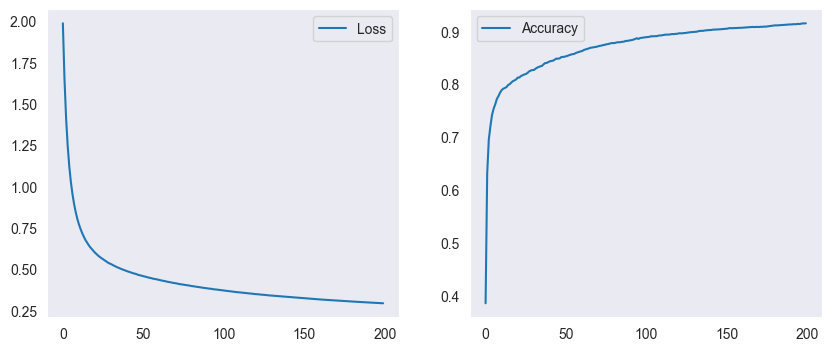

loss 0.3154 - acc 0.910 


  0%|          | 0/200 [00:00<?, ?it/s]

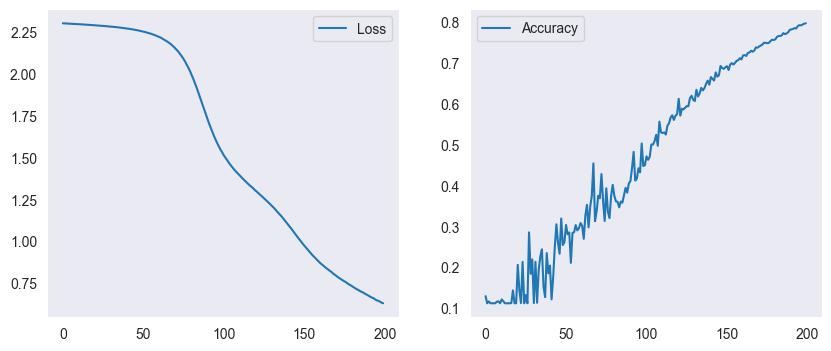

loss 0.6272 - acc 0.798 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

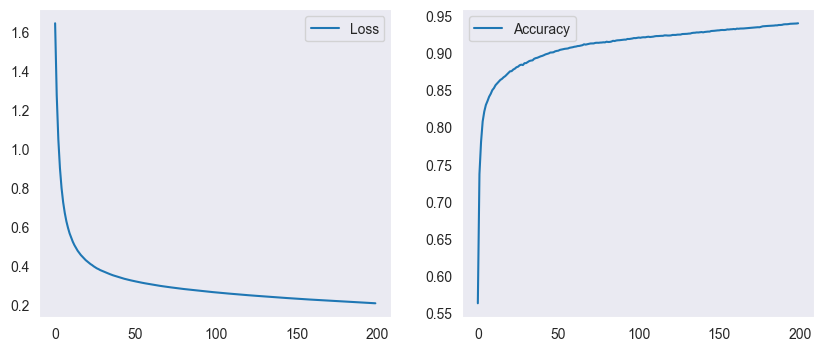

loss 0.2473 - acc 0.930 


  0%|          | 0/200 [00:00<?, ?it/s]

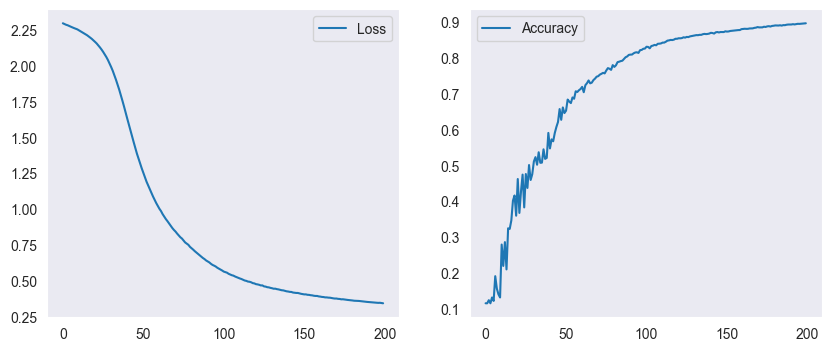

loss 0.3782 - acc 0.890 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

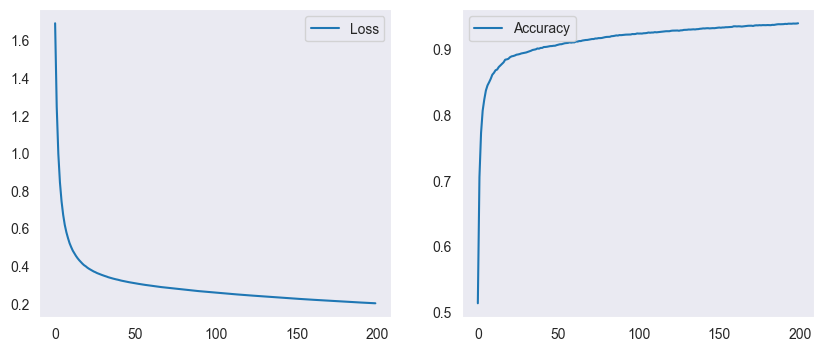

loss 0.2225 - acc 0.938 


  0%|          | 0/200 [00:00<?, ?it/s]

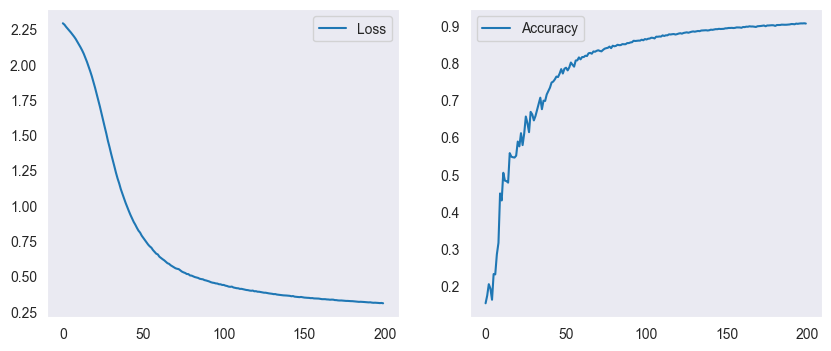

loss 0.3362 - acc 0.902 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

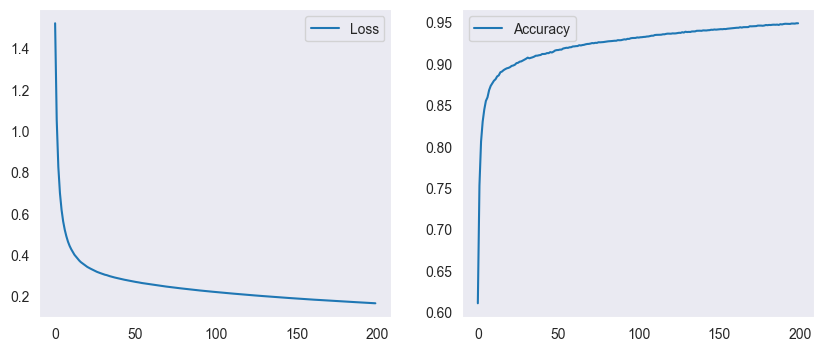

loss 0.2133 - acc 0.940 


  0%|          | 0/200 [00:00<?, ?it/s]

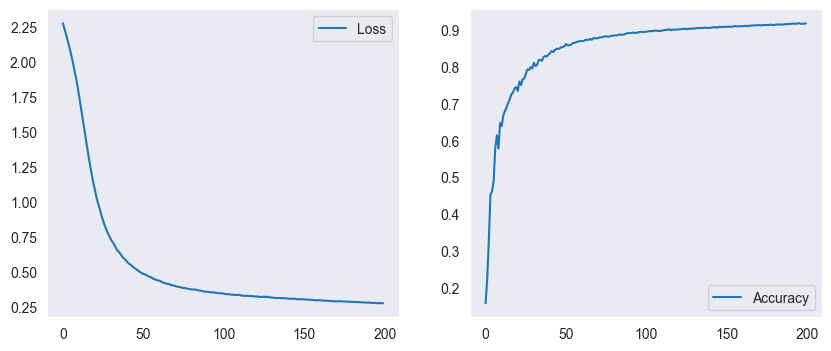

loss 0.3310 - acc 0.905 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

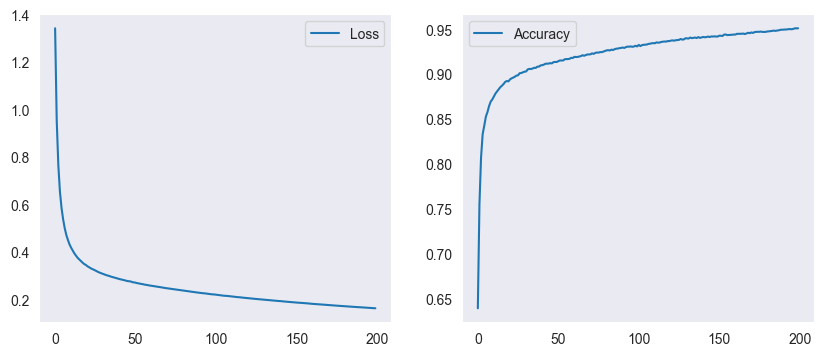

loss 0.2025 - acc 0.944 


  0%|          | 0/200 [00:00<?, ?it/s]

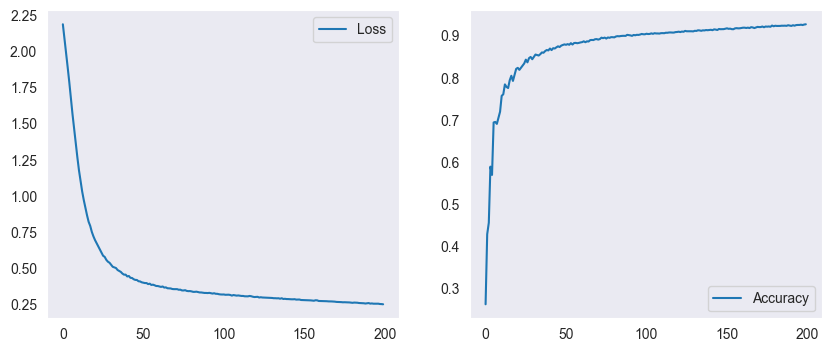

loss 0.3218 - acc 0.910 


In [10]:
results = []
for n_neuron in n_neurons:
    config = [[784, n_neuron], [n_neuron,n_neuron], [n_neuron,n_neuron], [n_neuron, 10]]
    result = {
        "n_layers": 4,
        "n_neurons": n_neuron,
        "n_samples": 30000,
    }
    loss1, acc1 = train_test(config, hparams, X_train, y_train, X_test, y_test, pretrain=True)
    result["loss1"] = loss1
    result["acc1"] = acc1
    loss2, acc2 = train_test(config, hparams, X_train, y_train, X_test, y_test, pretrain=False)
    result["loss2"] = loss2
    result["acc2"] = acc2
    results.append(result)

In [11]:
# Save the results in a CSV file
df = pd.DataFrame(results)
df.to_csv("./Results/results_neurons.csv", index=False)
df

,n_layers,n_neurons,n_samples,loss1,acc1,loss2,acc2
0,4,100,30000,0.315436,0.9104,0.627245,0.7978
1,4,200,30000,0.247306,0.9303,0.378169,0.8899
2,4,300,30000,0.222549,0.9376,0.336174,0.9020
3,4,500,30000,0.213309,0.9398,0.330966,0.9052
4,4,700,30000,0.202471,0.9442,0.321771,0.9105


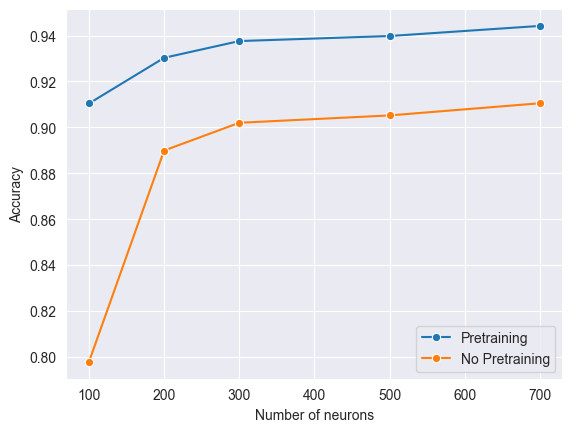

In [12]:
sns.lineplot(data=df, x="n_neurons", y="acc1", marker="o", label="Pretraining")
sns.lineplot(data=df, x="n_neurons", y="acc2", marker="o", label="No Pretraining")
plt.xlabel("Number of neurons")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("./Results/accuracy_vs_neurons.pdf", bbox_inches="tight")
plt.show()

### Number of samples

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

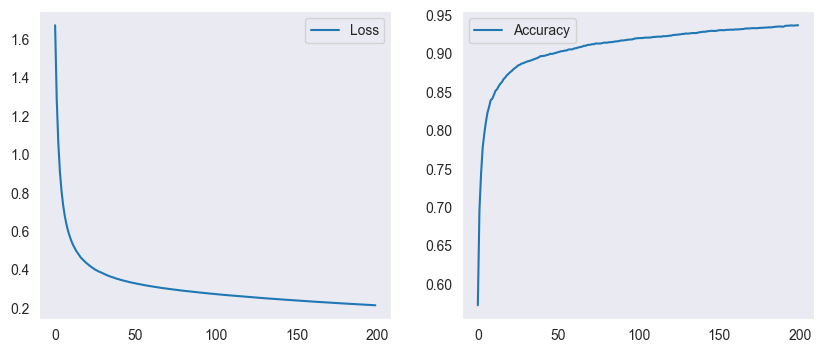

loss 0.2485 - acc 0.929 


  0%|          | 0/200 [00:00<?, ?it/s]

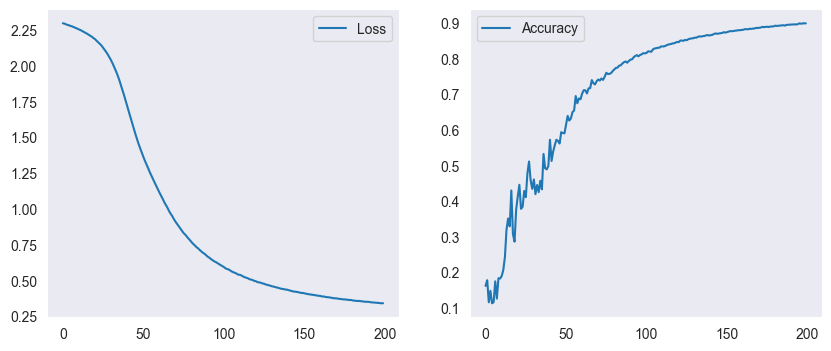

loss 0.3749 - acc 0.889 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

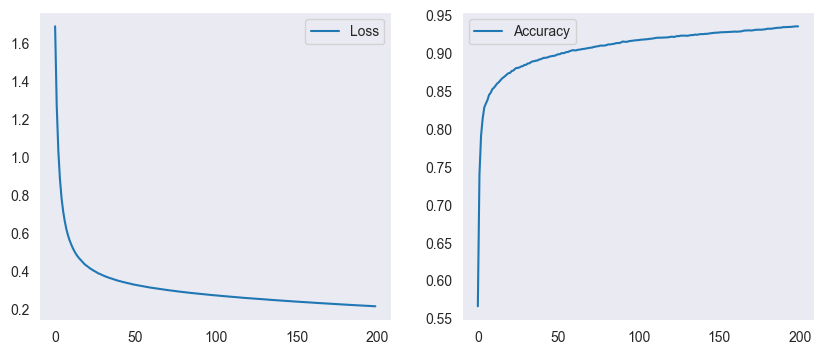

loss 0.2497 - acc 0.932 


  0%|          | 0/200 [00:00<?, ?it/s]

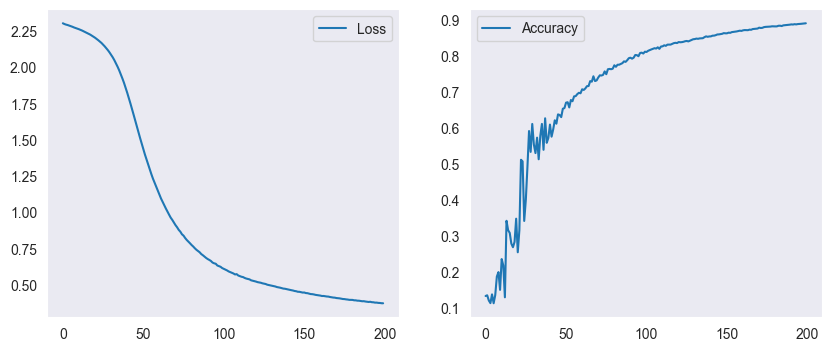

loss 0.3688 - acc 0.890 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

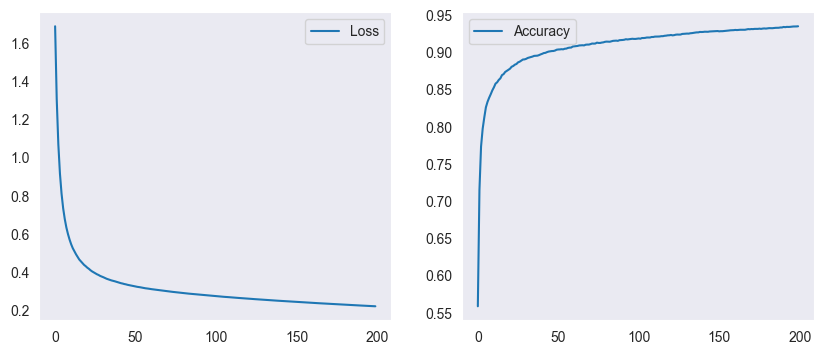

loss 0.2523 - acc 0.931 


  0%|          | 0/200 [00:00<?, ?it/s]

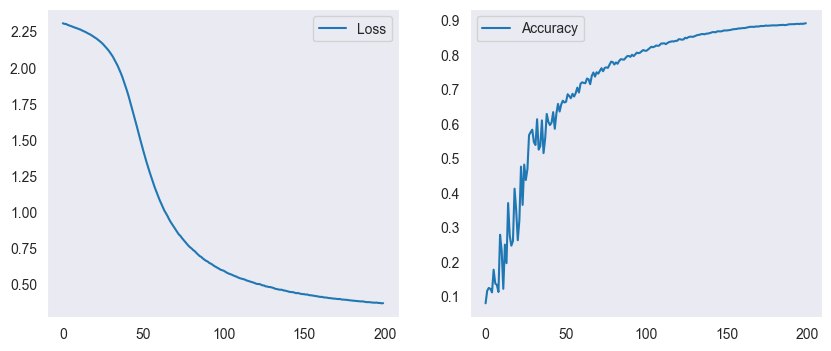

loss 0.3841 - acc 0.886 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

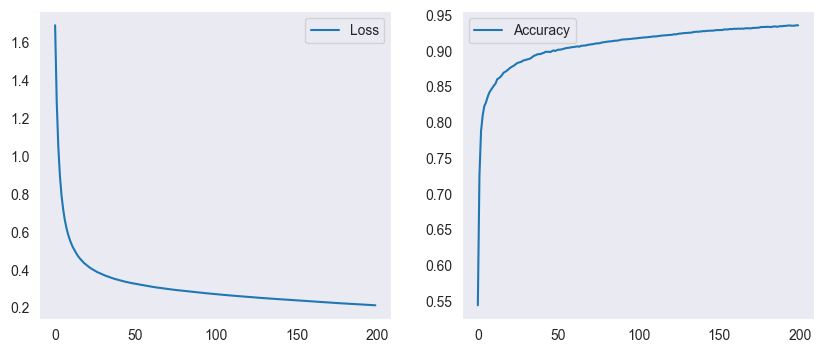

loss 0.2431 - acc 0.931 


  0%|          | 0/200 [00:00<?, ?it/s]

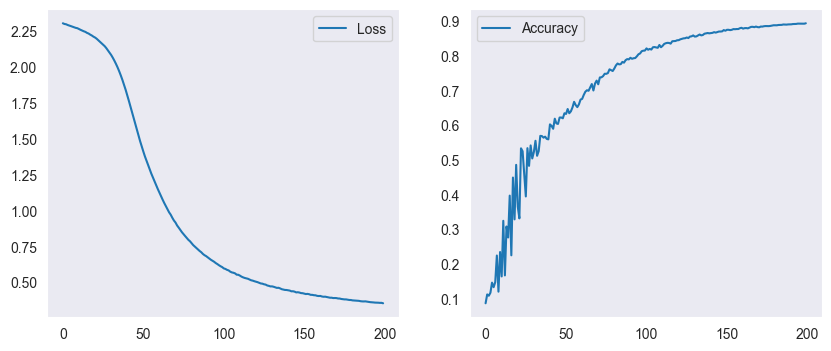

loss 0.3681 - acc 0.888 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

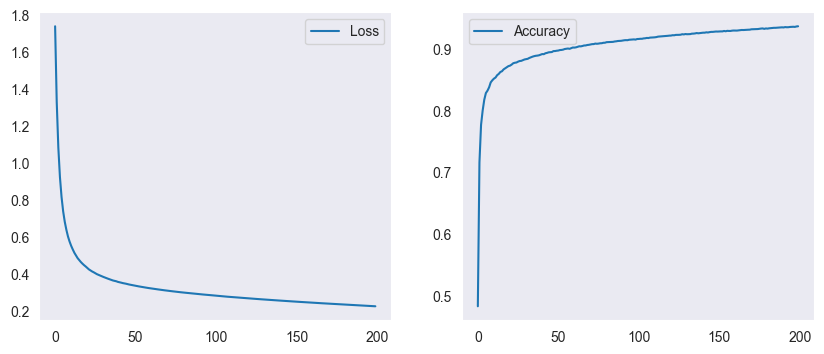

loss 0.2483 - acc 0.929 


  0%|          | 0/200 [00:00<?, ?it/s]

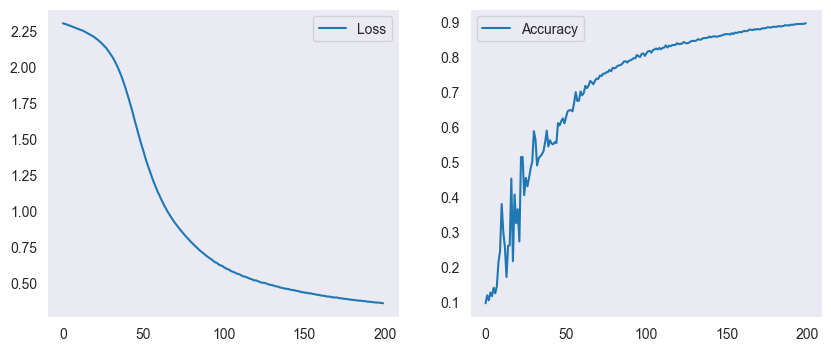

loss 0.3751 - acc 0.889 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

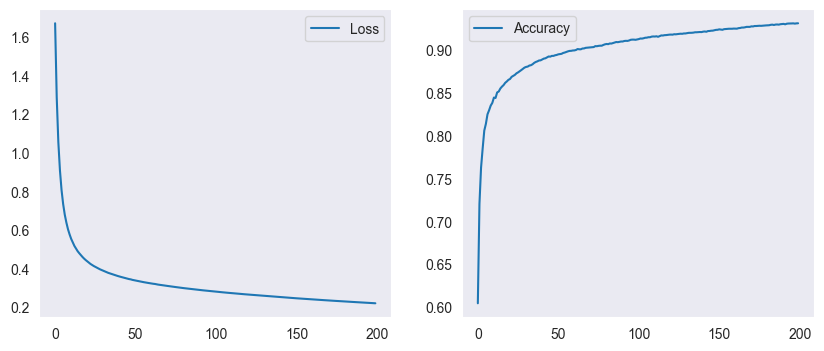

loss 0.2552 - acc 0.928 


  0%|          | 0/200 [00:00<?, ?it/s]

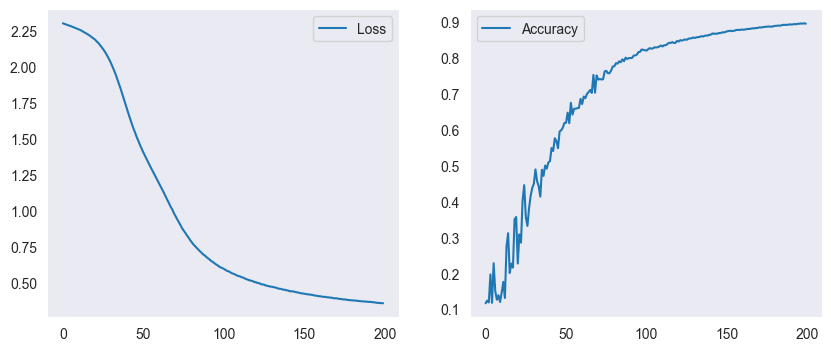

loss 0.3791 - acc 0.886 


In [14]:
results = []
for n_sample in n_samples:
    n_neuron = 200
    config = [[784, n_neuron], [n_neuron,n_neuron], [n_neuron,n_neuron], [n_neuron, 10]]
    result = {
        "n_layers": 4,
        "n_neurons": n_neuron,
        "n_samples": n_sample,
    }
    loss1, acc1 = train_test(config, hparams, X_train, y_train, X_test, y_test, pretrain=True)
    result["loss1"] = loss1
    result["acc1"] = acc1
    loss2, acc2 = train_test(config, hparams, X_train, y_train, X_test, y_test, pretrain=False)
    result["loss2"] = loss2
    result["acc2"] = acc2
    results.append(result)

In [15]:
# Save the results in a CSV file
df = pd.DataFrame(results)
df.to_csv("./Results/results_samples.csv", index=False)
df

,n_layers,n_neurons,n_samples,loss1,acc1,loss2,acc2
0,4,200,1000,0.248494,0.9294,0.374915,0.8887
1,4,200,3000,0.249710,0.9324,0.368847,0.8898
2,4,200,7000,0.252331,0.9307,0.384059,0.8865
3,4,200,10000,0.243139,0.9311,0.368067,0.8885
4,4,200,30000,0.248260,0.9295,0.375107,0.8891
5,4,200,60000,0.255216,0.9280,0.379122,0.8864


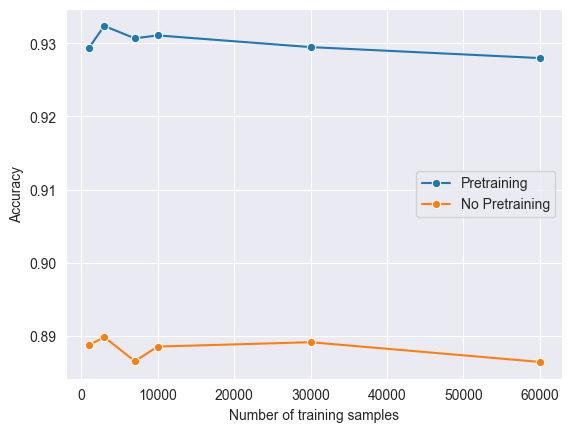

In [16]:
sns.lineplot(data=df, x="n_samples", y="acc1", marker="o", label="Pretraining")
sns.lineplot(data=df, x="n_samples", y="acc2", marker="o", label="No Pretraining")
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("./Results/accuracy_vs_samples.pdf", bbox_inches="tight")
plt.show()